# **V-Shaped well of potential**
We start importing libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

:We define a function with the potential for the Schrödinger Equation. In trhis case it will be proportional to the position, with a slope of 2 because that is the Vo used in the example we are comparing our results to

In [ ]:
#Potential as a function of position
def getV(x):
    potvalue = 2*np.abs(x)
    return potvalue

And now we define a function that calculates the matrix (denoted by F in the theoretical derivation) that encodes the Schrödinger Equation in finite diference form for n points from 0 to n-1

In [ ]:
#Discretized Schrodinger equation in n points (FROM 0 to n-1)
def Eq(n,h,x):
    F = np.zeros([n,n])
    for i in range(0,n):
        F[i,i] =  -2*((h**2)*getV(x[i]) + 1)
        if i > 0:
           F[i,i-1] = 1
           if i < n-1:
              F[i,i+1] = 1
    return F

Up to now, the code does nothing explicitly. We have just defined how to calculate the potential and how to calculate the matrix F

Let us now start the numerical solution, entering the parameters that we need: the discretization h and the size of the box.

In [44]:
# Interval for calculating the wave function [-L/2,L/2]
L = 10
xlower = -L/2.0
xupper = L/2.0

#Discretization options, to get more points we have to decrease the steps in the arrange
h = 0.01  #discretization in space

#Create coordinates at which the solution will be calculated
x = np.arange(xlower,xupper+h,h)
#grid size (how many discrete points to use in the range [-L/2,L/2])
npoints=len(x)

print("Using",npoints, "grid points.")

Using 1001 grid points.


Now we can calculate F explicitly and diagonalize. The result of the diagonalization is **not ordered** so we have to order the results (energies and wavefunctions) by energy values.

In [45]:
#Calculation of discrete form of Schrodinger Equation and diagonalization
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Order results by eigenvalue
# w ordered eigenvalues and vs ordered eigenvectors
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

#Energy Level
E = - w/(2.0*h**2)

Print **Energy Results** and compare with reference:

In [46]:
#Energy Levels
E = - w/(2.0*h**2)
E_reference=[1.284,2.946,4.093,5.153,6.089,7.030]
for k in range(0,6):
  print("n=",k,", E(numeric)=%.4f" %E[k],",E(reference)=" ,E_reference[k] )

n= 0 , E(numeric)=1.2836 ,E(reference)= 1.284
n= 1 , E(numeric)=2.9458 ,E(reference)= 2.946
n= 2 , E(numeric)=4.0924 ,E(reference)= 4.093
n= 3 , E(numeric)=5.1504 ,E(reference)= 5.153
n= 4 , E(numeric)=6.0730 ,E(reference)= 6.089
n= 5 , E(numeric)=6.9570 ,E(reference)= 7.03


Now let us show the Wavefunctions obtained in the diagonalization process

Plotting


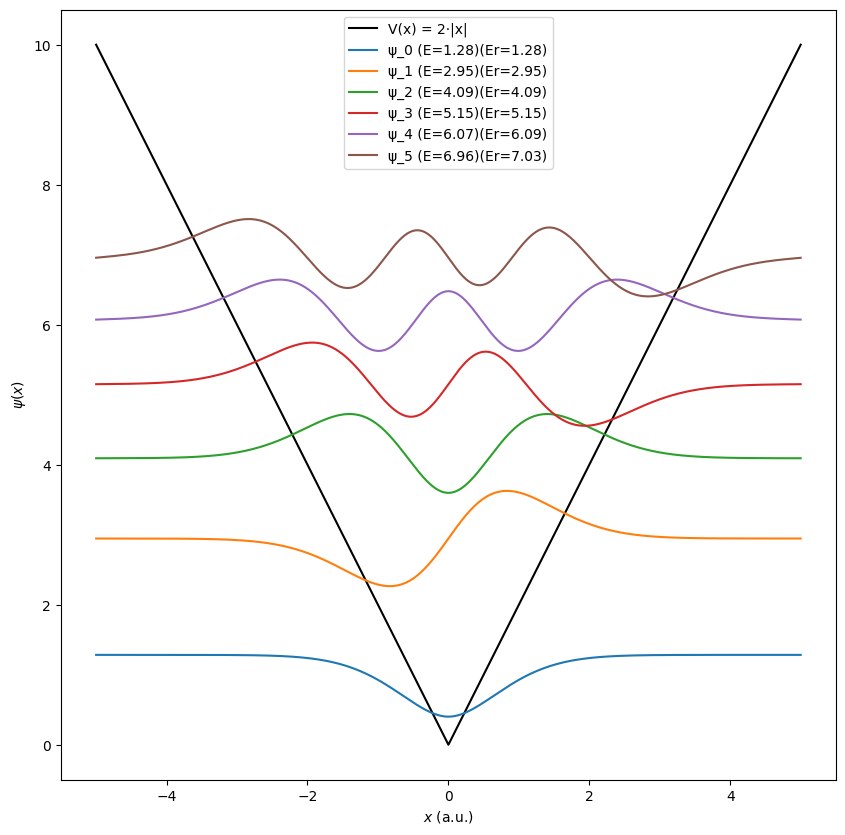

In [47]:
#Init Wavefunction (empty list with npoints elements)
psi = [None]*npoints

#Calculation of normalised Wave Functions
for k in range(0,len(w)):
	psi[k] = vs[:,k]
	integral = h*np.dot(psi[k],psi[k])
	psi[k] = psi[k]/integral**0.5

#Plot Wave functions
print("Plotting")
plt.figure(figsize=(10,10))
# Plot potential
plt.plot(x, 2*np.abs(x), 'k', label="V(x) = 2·|x|")
plt.xlabel(r'$x$ (a.u.)')
plt.ylabel(r'$\psi(x)$')


for k in range(0,6):
	plt.plot(x,psi[k]+E[k],label=f"ψ_{k} (E={E[k]:.2f})(Er={E_reference[k]:.2f})")

plt.legend()
plt.show()
